# TEST OF DIFFERENT LOGIT MODEL CALIBRATIONS

This document could potentially be used to test whichever logit calibration

## 1. Import libraries and download files

In [1]:
# libraries to import
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ast import literal_eval
from typing import Dict
import biogeme
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
print(os.getcwd())
os.chdir(r"C:\Users\LMENENDEZ\GitHub\MultiModX")
print(os.getcwd())
pd.set_option('display.max_columns', None)

c:\Users\LMENENDEZ\GitHub\MultiModX\notebooks
C:\Users\LMENENDEZ\GitHub\MultiModX


In [2]:
%load_ext autoreload

In [3]:
%autoreload
from strategic_evaluator.logit_model import *
from script.trips_format import *

In [4]:
trips_logit=pd.read_csv(r"C:\Users\LMENENDEZ\GitHub\MultiModX\trips_logit.csv")

In [5]:
#import the file necessary to calibrate the logit model 
trips_logit.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.500000,10.89,3.41,1,58.504,45.967302,1.000000,0.895619,1.000000,1.064722,1.000000,4.659657,1.000000,2.642030,1.000000,3.27467,1.000000
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
2,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
3,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
4,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,742.468,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140


In [6]:
trips_logit=trips_logit_format(trips_logit)

In [7]:
paths_w_costs=generate_paths_w_costs(trips_logit)

In [8]:
calibration_matrix=generate_calibration_matrix(trips_logit,paths_w_costs)

In [9]:
calibration_matrix_improved=generate_calibration_matrix(trips_logit,paths_w_costs,drop_single_paths=True)

## 2. Download calibration results of generate new calibration results

Let us compare more thorougbly the normal calibration and the calibration without the rows with one single option

Frist we calibrate eliminating the single option O-D pairs

In [10]:
# Delete pickle files if they already exist for archetypes 0 to 5
for k in range(6):
    pickle_file = f"archetype_{k}.pickle"
    if os.path.exists(pickle_file):
        os.remove(pickle_file)
        print(f"Deleted {pickle_file}")
    else:
        print(f"{pickle_file} does not exist.")

Deleted archetype_0.pickle
Deleted archetype_1.pickle
Deleted archetype_2.pickle
Deleted archetype_3.pickle
Deleted archetype_4.pickle
Deleted archetype_5.pickle


In [11]:
# test without fixed parameters
database_path = r"C:\Users\LMENENDEZ\GitHub\MultiModX\calibration_matrix.csv"
n_archetypes = 6
n_alternatives = 3
test=calibrate_main(database_path, n_archetypes, n_alternatives)

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...


Training results:
Results for model archetype_0
Nbr of parameters:		5
Sample size:			1952
Excluded data:			0
Final log likelihood:		-1147.019
Akaike Information Criterion:	2304.039
Bayesian Information Criterion:	2331.922

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.411804      1.196567     0.344154      0.730730
ASC_TRAIN -0.843429      1.225705    -0.688117      0.491379
B_CO2     -0.053754      0.011458    -4.691363      0.000003
B_COST     0.004364      0.005724     0.762344      0.445854
B_TIME    -0.015522      0.001169   -13.282735      0.000000
{'ASC_PLANE': np.float64(0.4118036094078656), 'ASC_TRAIN': np.float64(-0.843428731842975), 'B_CO2': np.float64(-0.053754112929309705), 'B_COST': np.float64(0.004363992249033029), 'B_TIME': np.float64(-0.015521859819302784)}
Test results:
{'ASC_PLANE': np.float64(0.4118036094078656), 'ASC_TRAIN': np.float64(-0.843428731842975), 'B_CO2': np.float64(-0.053754112929309705), 'B_COST': np.float64(0.004363992249033

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...


Training results:
Results for model archetype_1
Nbr of parameters:		5
Sample size:			1952
Excluded data:			0
Final log likelihood:		-948.4802
Akaike Information Criterion:	1906.96
Bayesian Information Criterion:	1934.843

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  2.038470      1.713677     1.189530      0.234231
ASC_TRAIN  0.200189      1.715066     0.116724      0.907079
B_CO2     -0.046082      0.010157    -4.537068      0.000006
B_COST    -0.004184      0.005331    -0.784949      0.432483
B_TIME    -0.011993      0.000987   -12.145642      0.000000
{'ASC_PLANE': np.float64(2.0384698449557983), 'ASC_TRAIN': np.float64(0.200188556150293), 'B_CO2': np.float64(-0.0460819579060057), 'B_COST': np.float64(-0.00418432889478373), 'B_TIME': np.float64(-0.011992940014981192)}
Test results:
{'ASC_PLANE': np.float64(2.0384698449557983), 'ASC_TRAIN': np.float64(0.200188556150293), 'B_CO2': np.float64(-0.0460819579060057), 'B_COST': np.float64(-0.00418432889478373), '

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...


Training results:
Results for model archetype_2
Nbr of parameters:		5
Sample size:			1952
Excluded data:			0
Final log likelihood:		-1045.676
Akaike Information Criterion:	2101.352
Bayesian Information Criterion:	2129.235

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.455973      1.772079     0.821618  4.112941e-01
ASC_TRAIN -0.478471      1.786901    -0.267766  7.888797e-01
B_CO2     -0.055455      0.010820    -5.125424  2.968684e-07
B_COST    -0.001099      0.005428    -0.202560  8.394790e-01
B_TIME    -0.011715      0.000947   -12.368057  0.000000e+00
{'ASC_PLANE': np.float64(1.4559726847960326), 'ASC_TRAIN': np.float64(-0.4784705285642044), 'B_CO2': np.float64(-0.05545494449810354), 'B_COST': np.float64(-0.0010994784125689665), 'B_TIME': np.float64(-0.011714711233761712)}
Test results:
{'ASC_PLANE': np.float64(1.4559726847960326), 'ASC_TRAIN': np.float64(-0.4784705285642044), 'B_CO2': np.float64(-0.05545494449810354), 'B_COST': np.float64(-0.001099478412

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...


Training results:
Results for model archetype_3
Nbr of parameters:		5
Sample size:			1952
Excluded data:			0
Final log likelihood:		-974.3973
Akaike Information Criterion:	1958.795
Bayesian Information Criterion:	1986.678

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.594302      1.245781     0.477052      0.633325
ASC_TRAIN -0.772082      1.264995    -0.610344      0.541634
B_CO2     -0.033180      0.009794    -3.387778      0.000705
B_COST    -0.007119      0.005291    -1.345385      0.178501
B_TIME    -0.013895      0.001053   -13.196779      0.000000
{'ASC_PLANE': np.float64(0.5943024930439783), 'ASC_TRAIN': np.float64(-0.7720822095734388), 'B_CO2': np.float64(-0.033180188897947556), 'B_COST': np.float64(-0.007118849563391781), 'B_TIME': np.float64(-0.013894556055106843)}
Test results:
{'ASC_PLANE': np.float64(0.5943024930439783), 'ASC_TRAIN': np.float64(-0.7720822095734388), 'B_CO2': np.float64(-0.033180188897947556), 'B_COST': np.float64(-0.00711884956

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...


Training results:
Results for model archetype_4
Nbr of parameters:		5
Sample size:			1952
Excluded data:			0
Final log likelihood:		-1163.333
Akaike Information Criterion:	2336.667
Bayesian Information Criterion:	2364.55

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.820393      1.855873     0.980882      0.326651
ASC_TRAIN  0.627726      1.864086     0.336747      0.736307
B_CO2     -0.038814      0.009435    -4.113930      0.000039
B_COST    -0.003704      0.004703    -0.787502      0.430988
B_TIME    -0.012791      0.000958   -13.345400      0.000000
{'ASC_PLANE': np.float64(1.8203925921102764), 'ASC_TRAIN': np.float64(0.6277257258821999), 'B_CO2': np.float64(-0.038813663693647346), 'B_COST': np.float64(-0.003703801629810878), 'B_TIME': np.float64(-0.012791358188937422)}
Test results:
{'ASC_PLANE': np.float64(1.8203925921102764), 'ASC_TRAIN': np.float64(0.6277257258821999), 'B_CO2': np.float64(-0.038813663693647346), 'B_COST': np.float64(-0.00370380162981

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 3[2.0]-6[2.0]-11[2.0]-12[2.0]-13[2.0]-18[2.0]-28[2.0]-33[2.0]-36[2.0]-41[2.0]-42[2.0]-43[2.0]-47[2.0...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-4[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-14[3.0]-17[3.0]-18[3.0]-20...


Training results:
Results for model archetype_5
Nbr of parameters:		5
Sample size:			1952
Excluded data:			0
Final log likelihood:		-1134.676
Akaike Information Criterion:	2279.353
Bayesian Information Criterion:	2307.236

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.648762      1.601601     1.029446      0.303270
ASC_TRAIN  0.028724      1.608027     0.017863      0.985748
B_CO2     -0.044047      0.010008    -4.401064      0.000011
B_COST    -0.003240      0.005335    -0.607403      0.543583
B_TIME    -0.012684      0.001003   -12.641375      0.000000
{'ASC_PLANE': np.float64(1.6487617515590072), 'ASC_TRAIN': np.float64(0.028724195754641246), 'B_CO2': np.float64(-0.04404675230051579), 'B_COST': np.float64(-0.003240397831339756), 'B_TIME': np.float64(-0.012684187715087647)}
Test results:
{'ASC_PLANE': np.float64(1.6487617515590072), 'ASC_TRAIN': np.float64(0.028724195754641246), 'B_CO2': np.float64(-0.04404675230051579), 'B_COST': np.float64(-0.00324039783

In [12]:
# Delete pickle files if they already exist for archetypes 0 to 5
for k in range(6):
    pickle_file = f"archetype_{k}.pickle"
    if os.path.exists(pickle_file):
        os.remove(pickle_file)
        print(f"Deleted {pickle_file}")
    else:
        print(f"{pickle_file} does not exist.")

Deleted archetype_0.pickle
Deleted archetype_1.pickle
Deleted archetype_2.pickle
Deleted archetype_3.pickle
Deleted archetype_4.pickle
Deleted archetype_5.pickle


In [13]:
database_path = r"C:\Users\LMENENDEZ\GitHub\MultiModX\calibration_matrix_improved.csv"
n_archetypes = 6
n_alternatives = 3
test_improved=calibrate_main(database_path, n_archetypes, n_alternatives)

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...


Training results:
Results for model archetype_0
Nbr of parameters:		5
Sample size:			1278
Excluded data:			0
Final log likelihood:		-920.5191
Akaike Information Criterion:	1851.038
Bayesian Information Criterion:	1876.804

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.201609      1.742208     0.115720      0.907874
ASC_TRAIN -0.436623      1.762480    -0.247732      0.804342
B_CO2     -0.045615      0.012195    -3.740545      0.000184
B_COST     0.003713      0.006214     0.597465      0.550197
B_TIME    -0.017122      0.001454   -11.771873      0.000000
{'ASC_PLANE': np.float64(0.20160913729156305), 'ASC_TRAIN': np.float64(-0.436622640153361), 'B_CO2': np.float64(-0.04561537673356176), 'B_COST': np.float64(0.0037126989406509607), 'B_TIME': np.float64(-0.017122117029554206)}
Test results:
{'ASC_PLANE': np.float64(0.20160913729156305), 'ASC_TRAIN': np.float64(-0.436622640153361), 'B_CO2': np.float64(-0.04561537673356176), 'B_COST': np.float64(0.00371269894065

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...


Training results:
Results for model archetype_1
Nbr of parameters:		5
Sample size:			1278
Excluded data:			0
Final log likelihood:		-843.7504
Akaike Information Criterion:	1697.501
Bayesian Information Criterion:	1723.266

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.774280      1.633790     1.085990      0.277483
ASC_TRAIN  0.726422      1.640954     0.442682      0.657995
B_CO2     -0.036525      0.010699    -3.413747      0.000641
B_COST    -0.004399      0.005682    -0.774262      0.438776
B_TIME    -0.013957      0.001265   -11.036591      0.000000
{'ASC_PLANE': np.float64(1.7742795472099102), 'ASC_TRAIN': np.float64(0.7264218092943144), 'B_CO2': np.float64(-0.03652451577800706), 'B_COST': np.float64(-0.004399408300041395), 'B_TIME': np.float64(-0.013957238097995239)}
Test results:
{'ASC_PLANE': np.float64(1.7742795472099102), 'ASC_TRAIN': np.float64(0.7264218092943144), 'B_CO2': np.float64(-0.03652451577800706), 'B_COST': np.float64(-0.004399408300041

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...


Training results:
Results for model archetype_2
Nbr of parameters:		5
Sample size:			1278
Excluded data:			0
Final log likelihood:		-899.2254
Akaike Information Criterion:	1808.451
Bayesian Information Criterion:	1834.216

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.230240      2.138555     0.575267      0.565111
ASC_TRAIN  0.271168      2.155569     0.125799      0.899891
B_CO2     -0.041177      0.011052    -3.725740      0.000195
B_COST    -0.001851      0.005759    -0.321438      0.747879
B_TIME    -0.014340      0.001246   -11.507684      0.000000
{'ASC_PLANE': np.float64(1.2302403821988437), 'ASC_TRAIN': np.float64(0.27116776311558555), 'B_CO2': np.float64(-0.041176592590652164), 'B_COST': np.float64(-0.0018511531617350799), 'B_TIME': np.float64(-0.014339879546068395)}
Test results:
{'ASC_PLANE': np.float64(1.2302403821988437), 'ASC_TRAIN': np.float64(0.27116776311558555), 'B_CO2': np.float64(-0.041176592590652164), 'B_COST': np.float64(-0.0018511531

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...


Training results:
Results for model archetype_3
Nbr of parameters:		5
Sample size:			1278
Excluded data:			0
Final log likelihood:		-837.3055
Akaike Information Criterion:	1684.611
Bayesian Information Criterion:	1710.376

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.556804      1.436672     0.387565      0.698338
ASC_TRAIN -0.430069      1.458007    -0.294971      0.768016
B_CO2     -0.025856      0.010644    -2.429176      0.015133
B_COST    -0.008967      0.005815    -1.541924      0.123092
B_TIME    -0.014478      0.001265   -11.447506      0.000000
{'ASC_PLANE': np.float64(0.5568038543730451), 'ASC_TRAIN': np.float64(-0.43006944060543), 'B_CO2': np.float64(-0.025855959693424527), 'B_COST': np.float64(-0.008966806382245633), 'B_TIME': np.float64(-0.014477849930881088)}
Test results:
{'ASC_PLANE': np.float64(0.5568038543730451), 'ASC_TRAIN': np.float64(-0.43006944060543), 'B_CO2': np.float64(-0.025855959693424527), 'B_COST': np.float64(-0.008966806382245

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...


Training results:
Results for model archetype_4
Nbr of parameters:		5
Sample size:			1278
Excluded data:			0
Final log likelihood:		-935.9073
Akaike Information Criterion:	1881.815
Bayesian Information Criterion:	1907.58

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.164925      2.575524     0.452306      0.651049
ASC_TRAIN  0.391922      2.581292     0.151832      0.879320
B_CO2     -0.032601      0.010390    -3.137797      0.001702
B_COST    -0.004558      0.005331    -0.855027      0.392536
B_TIME    -0.013830      0.001227   -11.275334      0.000000
{'ASC_PLANE': np.float64(1.1649250691471693), 'ASC_TRAIN': np.float64(0.3919217661374823), 'B_CO2': np.float64(-0.032601457048625486), 'B_COST': np.float64(-0.004557806446162661), 'B_TIME': np.float64(-0.013830093565700158)}
Test results:
{'ASC_PLANE': np.float64(1.1649250691471693), 'ASC_TRAIN': np.float64(0.3919217661374823), 'B_CO2': np.float64(-0.032601457048625486), 'B_COST': np.float64(-0.00455780644616

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 3[3.0]-7[3.0]-8[3.0]-10[3.0]-12[3.0]-13[3.0]-15[3.0]-16[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]...


Training results:
Results for model archetype_5
Nbr of parameters:		5
Sample size:			1278
Excluded data:			0
Final log likelihood:		-923.7189
Akaike Information Criterion:	1857.438
Bayesian Information Criterion:	1883.203

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.322339      1.923201     0.687572      0.491722
ASC_TRAIN  0.387466      1.931461     0.200608      0.841005
B_CO2     -0.035923      0.011062    -3.247374      0.001165
B_COST    -0.003625      0.005832    -0.621589      0.534212
B_TIME    -0.014247      0.001273   -11.191582      0.000000
{'ASC_PLANE': np.float64(1.3223392244828314), 'ASC_TRAIN': np.float64(0.3874660754462413), 'B_CO2': np.float64(-0.03592343656958257), 'B_COST': np.float64(-0.00362512056201272), 'B_TIME': np.float64(-0.014247241181968162)}
Test results:
{'ASC_PLANE': np.float64(1.3223392244828314), 'ASC_TRAIN': np.float64(0.3874660754462413), 'B_CO2': np.float64(-0.03592343656958257), 'B_COST': np.float64(-0.0036251205620127

In [14]:
archetypes_improved = {}
for i in range(6):
    archetypes_improved[f"archetype_{i}"] = res.bioResults(pickle_file=f"archetype_{i}.pickle")
    # print(archetypes[f"archetype_{i}"])

## 3. Generate calibration summary

In [15]:
calibration_results_summary(archetypes_improved)

,Archetype,ASC_PLANE,ASC_PLANE_SIGNIFICANCE,ASC_TRAIN,ASC_TRAIN_SIGNIFICANCE,B_CO2,B_CO2_SIGNIFICANCE,B_TIME,B_TIME_SIGNIFICANCE,B_COST,B_COST_SIGNIFICANCE
0,Archetype 0,0.201609,False,-0.436623,False,-0.045615,True,-0.017122,True,0.003713,False
1,Archetype 1,1.774280,False,0.726422,False,-0.036525,True,-0.013957,True,-0.004399,False
2,Archetype 2,1.230240,False,0.271168,False,-0.041177,True,-0.014340,True,-0.001851,False
3,Archetype 3,0.556804,False,-0.430069,False,-0.025856,True,-0.014478,True,-0.008967,False
4,Archetype 4,1.164925,False,0.391922,False,-0.032601,True,-0.013830,True,-0.004558,False
5,Archetype 5,1.322339,False,0.387466,False,-0.035923,True,-0.014247,True,-0.003625,False


Now I want to compare with the previous version of the Logit model I had

In [16]:
# Base path to the directory containing the pickle files
base_path = r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\v=0.8\sensitivities_v0.2"
archetypes_original = {}
# Loop through archetype files (0 to 6)
for i in range(6):  # 0 to 5 inclusive
    archetype=f"archetype_{i}"
    file_name = f"archetype_{i}.pickle"
    file_path = f"{base_path}\\{file_name}"
    archetype=pd.read_pickle(file_path)
    
    # Load the pickle file and assign it to a variable
    archetypes_original[f"archetype_{i}"] = res.bioResults(archetype)
    

In [17]:
calibration_results_summary(archetypes_original)

,Archetype,ASC_PLANE,ASC_PLANE_SIGNIFICANCE,ASC_TRAIN,ASC_TRAIN_SIGNIFICANCE,B_CO2,B_CO2_SIGNIFICANCE,B_TIME,B_TIME_SIGNIFICANCE,B_COST,B_COST_SIGNIFICANCE
0,Archetype 0,0.396035,False,-0.452849,False,-0.046671,True,-0.014836,True,0.004104,False
1,Archetype 1,2.513380,False,1.345527,False,-0.037802,True,-0.012258,True,-0.003004,False
2,Archetype 2,2.083996,False,0.938931,False,-0.045897,True,-0.012485,True,0.000712,False
3,Archetype 3,0.806660,False,-0.209278,False,-0.025542,True,-0.013210,True,-0.007698,False
4,Archetype 4,1.865037,False,0.970776,False,-0.035636,True,-0.012305,True,-0.002342,False
5,Archetype 5,1.817914,False,0.768713,False,-0.038662,True,-0.012913,True,-0.001230,False


## 4. Test the calibrations

In [18]:
final_test=test_logit(test,trips_logit, n_alternatives=5)

In [19]:
trips_logit_improved=trips_logit_format(trips_logit,drop_single_paths=True)

In [20]:
final_test_improved=test_logit(test_improved,trips_logit_improved,5)

In [21]:
evaluate_model(final_test_improved["archetype_0"],"arch_0")

arch_0 Evaluation:
Mean Squared Error: 0.0636
Mean Absolute Error: 0.1992
Pearson Correlation: 0.6403
Spearman Correlation: 0.6299
Standard deviation: 0.2516


(np.float64(0.0635990610158341),
 np.float64(0.19917269510194094),
 np.float64(0.6403217019556153),
 np.float64(0.6299215467587177),
 np.float64(0.2515724140272366))

I will stop here as the Logit model might need to be recalibrated

0 rows were removed


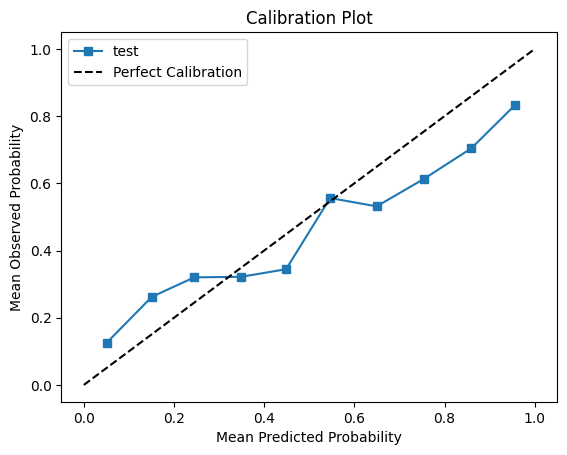

In [22]:
calibration_plot(final_test_improved["archetype_0"],"test")